# Create MeshID from 緯度経度

In [17]:
import numpy as np

def lat_lon_to_half_mesh(lat, lon):
    # メッシュの基準緯度経度
    base_lat = 24
    base_lon = 122
    
    # 緯度経度からメッシュコードを計算
    lat_index = int((lat - base_lat) * 60)  # 1/2度のメッシュ
    lon_index = int((lon - base_lon) * 60)
    
    # 緯度経度の範囲を基準にメッシュコードを計算
    mesh_code = f"{lat_index:02d}{lon_index:03d}"
    
    return mesh_code

# 真備町全域の緯度経度範囲（例）
min_lat, max_lat = 34.6, 34.75  # 緯度範囲
min_lon, max_lon = 133.65, 133.85  # 経度範囲

# メッシュサイズ（1/2メッシュの緯度・経度差）
lat_step = 0.5 / 60  # 緯度ステップ
lon_step = 0.5 / 60  # 経度ステップ

# 全メッシュコードをリストに追加
mesh_codes = []
lat = min_lat
while lat <= max_lat:
    lon = min_lon
    while lon <= max_lon:
        mesh_code = lat_lon_to_half_mesh(lat, lon)
        mesh_codes.append(mesh_code)
        lon += lon_step
    lat += lat_step

# カンマ区切りで出力
print(",".join(mesh_codes))


636699,636699,636699,636700,636700,636701,636701,636702,636702,636703,636703,636704,636704,636705,636705,636706,636706,636707,636707,636708,636708,636709,636709,636710,636710,636699,636699,636699,636700,636700,636701,636701,636702,636702,636703,636703,636704,636704,636705,636705,636706,636706,636707,636707,636708,636708,636709,636709,636710,636710,637699,637699,637699,637700,637700,637701,637701,637702,637702,637703,637703,637704,637704,637705,637705,637706,637706,637707,637707,637708,637708,637709,637709,637710,637710,637699,637699,637699,637700,637700,637701,637701,637702,637702,637703,637703,637704,637704,637705,637705,637706,637706,637707,637707,637708,637708,637709,637709,637710,637710,638699,638699,638699,638700,638700,638701,638701,638702,638702,638703,638703,638704,638704,638705,638705,638706,638706,638707,638707,638708,638708,638709,638709,638710,638710,638699,638699,638699,638700,638700,638701,638701,638702,638702,638703,638703,638704,638704,638705,638705,638706,638706,638707

# Check MeshID on Map


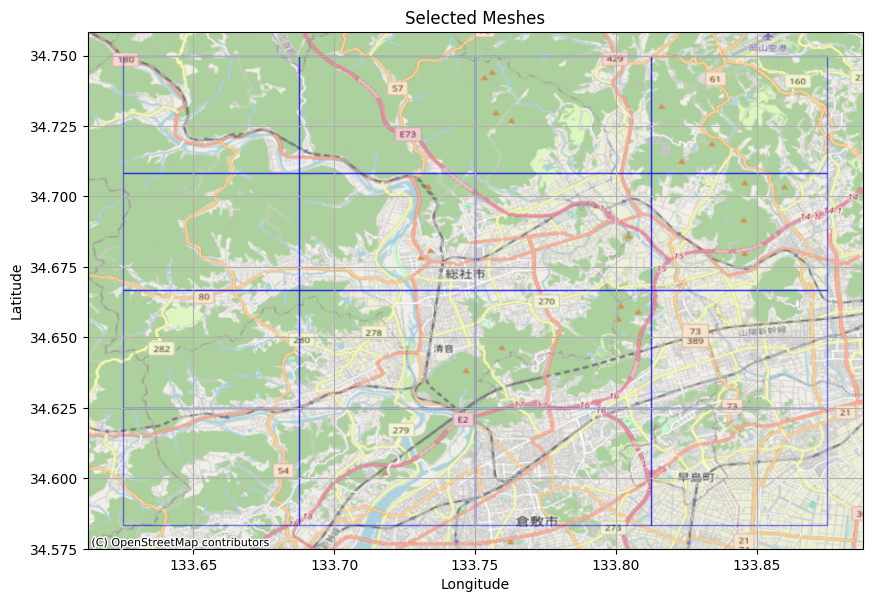

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import contextily as ctx

def mesh_to_latlon(mesh_id):
    # メッシュIDから緯度と経度を計算
    lat1 = int(mesh_id[0:2]) / 1.5
    lon1 = int(mesh_id[2:4]) + 100
    lat2 = int(mesh_id[4]) * 5 / 60
    lon2 = int(mesh_id[5]) * 7.5 / 60
    lat3 = int(mesh_id[6]) * 2.5 / 60
    lon3 = int(mesh_id[7]) * 3.75 / 60
    
    # 左下の座標
    lat_min = lat1 + lat2 + lat3
    lon_min = lon1 + lon2 + lon3
    
    # 右上の座標
    lat_max = lat_min + 2.5 / 60
    lon_max = lon_min + 3.75 / 60
    
    return (lat_min, lon_min), (lat_max, lon_max)

def plot_multiple_meshes_on_map(mesh_ids):
    polygons = []
    
    for mesh_id in mesh_ids:
        (lat_min, lon_min), (lat_max, lon_max) = mesh_to_latlon(mesh_id)
        
        # 四角形（メッシュ）を作成
        polygon = Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)])
        polygons.append(polygon)
    
    # GeopandasでGeoDataFrameを作成
    gdf = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:4326")
    
    # プロット
    ax = gdf.plot(edgecolor='blue', facecolor='none', alpha=0.5, figsize=(10, 10))
    
    # 背景地図の追加
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    
    # 地図の装飾
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Selected Meshes')
    plt.grid(True)
    
    # 地図を表示
    plt.show()

# サンプルメッシュIDリスト（例として）
mesh_ids = mesh_codes  # このリストを変更してください
plot_multiple_meshes_on_map(mesh_ids)
